In [ ]:
!pip install opencv-python-headless

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from google.colab import files
import shutil

In [ ]:
uploaded = files.upload()  # Select all 15 images

Saving christine laughing.jpg to christine laughing.jpg
Saving christine normal.jpg to christine normal.jpg
Saving christine surprised .jpg to christine surprised .jpg
Saving irene laughing.jpg to irene laughing.jpg
Saving irene normal.jpg to irene normal.jpg
Saving irene surprised.jpg to irene surprised.jpg
Saving jolly laughing.jpg to jolly laughing.jpg
Saving jolly normal.jpg to jolly normal.jpg
Saving jolly smiling.jpg to jolly smiling.jpg
Saving loic normal.jpg to loic normal.jpg
Saving loic smiling.jpg to loic smiling.jpg
Saving loic surprised.jpg to loic surprised.jpg
Saving roxanne normal.jpg to roxanne normal.jpg
Saving roxanne smiling.jpg to roxanne smiling.jpg
Saving roxanne surprised og.jpg to roxanne surprised og.jpg


In [ ]:
os.makedirs("images", exist_ok=True)

for fname in uploaded.keys():
    parts = fname.split('_')
    if len(parts) >= 2:
        member = parts[0]
        member_folder = os.path.join('images', member)
        os.makedirs(member_folder, exist_ok=True)
        shutil.move(fname, os.path.join(member_folder, fname))

In [ ]:
def display_image(img_path):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(os.path.basename(img_path))
    plt.axis('off')
    plt.show()

def augment_image(img):
    flip = cv2.flip(img, 1)
    rotate = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return [flip, rotate, gray]

In [ ]:
# Load pre-trained VGG16
base_model = VGG16(weights='imagenet', include_top=False, pooling='avg')
model = Model(inputs=base_model.input, outputs=base_model.output)

def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features.flatten()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
image_features = []
base_dir = 'images/'

for member in os.listdir(base_dir):
    member_path = os.path.join(base_dir, member)
    if not os.path.isdir(member_path):
        continue

    for img_file in os.listdir(member_path):
        img_path = os.path.join(member_path, img_file)
        expression = os.path.splitext(img_file)[0].split('_')[-1]

        # Display the image
        display_image(img_path)

        # Augment image (you can optionally display augmented ones)
        img_cv = cv2.imread(img_path)
        augmented_imgs = augment_image(img_cv)

        # Extract features for original + 2 augmentations
        try:
            features_original = extract_features(img_path)
            image_features.append([member, expression, 'original'] + features_original.tolist())

            # Save features for augmentations
            for i, aug in enumerate(augmented_imgs[:2]):
                # Save temp augmented image
                temp_path = f"temp_{member}_{expression}_{i}.jpg"
                if len(aug.shape) == 2:  # grayscale
                    aug = cv2.cvtColor(aug, cv2.COLOR_GRAY2RGB)
                cv2.imwrite(temp_path, aug)

                # Extract features
                features_aug = extract_features(temp_path)
                image_features.append([member, expression, f'aug_{i+1}'] + features_aug.tolist())

                # Remove temp file
                os.remove(temp_path)
        except Exception as e:
            print(f"Error processing {img_path}: {e}")


In [ ]:
print(len(image_features))
print(image_features)


0
[]


In [ ]:
import os

for root, dirs, files in os.walk('images'):
    print(f"\n📁 Folder: {root}")
    for f in files:
        print(f"  - {f}")



📁 Folder: images


In [ ]:
from google.colab import files
uploaded = files.upload()  # Re-upload all 15 facial images


Saving christine laughing.jpg to christine laughing (1).jpg
Saving christine normal.jpg to christine normal (1).jpg
Saving christine surprised .jpg to christine surprised  (1).jpg
Saving irene laughing.jpg to irene laughing (1).jpg
Saving irene normal.jpg to irene normal (1).jpg
Saving irene surprised.jpg to irene surprised (1).jpg
Saving jolly laughing.jpg to jolly laughing (1).jpg
Saving jolly normal.jpg to jolly normal (1).jpg
Saving jolly smiling.jpg to jolly smiling (1).jpg
Saving loic normal.jpg to loic normal (1).jpg
Saving loic smiling.jpg to loic smiling (1).jpg
Saving loic surprised.jpg to loic surprised (1).jpg
Saving roxanne normal.jpg to roxanne normal (1).jpg
Saving roxanne smiling.jpg to roxanne smiling (1).jpg
Saving roxanne surprised og.jpg to roxanne surprised og (1).jpg


In [ ]:
import os
import shutil

os.makedirs("images", exist_ok=True)

for fname in uploaded.keys():
    # Extract member name from the first part of filename
    member = fname.strip().lower().split()[0]
    member_folder = os.path.join('images', member)
    os.makedirs(member_folder, exist_ok=True)
    shutil.move(fname, os.path.join(member_folder, fname))


In [ ]:
for root, dirs, files in os.walk('images'):
    print(f"\n📁 Folder: {root}")
    for f in files:
        print(f"  - {f}")



📁 Folder: images

📁 Folder: images/christine
  - christine surprised  (1).jpg
  - christine normal (1).jpg
  - christine laughing (1).jpg

📁 Folder: images/loic
  - loic normal (1).jpg
  - loic surprised (1).jpg
  - loic smiling (1).jpg

📁 Folder: images/roxanne
  - roxanne surprised og (1).jpg
  - roxanne smiling (1).jpg
  - roxanne normal (1).jpg

📁 Folder: images/irene
  - irene surprised (1).jpg
  - irene normal (1).jpg
  - irene laughing (1).jpg

📁 Folder: images/jolly
  - jolly smiling (1).jpg
  - jolly laughing (1).jpg
  - jolly normal (1).jpg


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import pandas as pd
import os

# Load pretrained VGG16
base_model = VGG16(weights='imagenet', include_top=False, pooling='avg')
model = Model(inputs=base_model.input, outputs=base_model.output)

# Helper functions
def display_image(img_path):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(os.path.basename(img_path))
    plt.axis('off')
    plt.show()

def augment_image(img):
    flip = cv2.flip(img, 1)
    rotate = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    return [flip, rotate]

def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features.flatten()

def get_expression(filename):
    f = filename.lower()
    if "normal" in f:
        return "neutral"
    elif "smiling" in f or "laughing" in f:
        return "smile"
    elif "surprised" in f:
        return "surprise"
    else:
        return "unknown"

# Main loop
image_features = []
base_dir = "images/"

for member in os.listdir(base_dir):
    member_path = os.path.join(base_dir, member)
    if not os.path.isdir(member_path):
        continue

    for img_file in os.listdir(member_path):
        img_path = os.path.join(member_path, img_file)
        expression = get_expression(img_file)

        if expression == "unknown":
            print(f"⚠️ Skipping unrecognized expression: {img_file}")
            continue

        try:
            print(f"✅ Processing {img_file} for {member} - {expression}")

            # Original
            features_original = extract_features(img_path)
            image_features.append([member, expression, "original"] + features_original.tolist())

            # Augmentations
            img_cv = cv2.imread(img_path)
            augmented = augment_image(img_cv)
            for i, aug in enumerate(augmented):
                temp_path = f"temp_{member}_{expression}_{i}.jpg"
                cv2.imwrite(temp_path, aug)
                features_aug = extract_features(temp_path)
                image_features.append([member, expression, f"aug_{i+1}"] + features_aug.tolist())
                os.remove(temp_path)

        except Exception as e:
            print(f"❌ Error processing {img_file}: {e}")


✅ Processing christine surprised  (1).jpg for christine - surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step
✅ Processing christine normal (1).jpg for christine - neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step
✅ Processing christine laughing (1).jpg for christine - smile
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 876ms/step
✅ Processing loic normal (1).jpg for loic - neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step
✅ Processing loic surprised (1).jpg for loic - surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step
✅ Processing loic smiling (1).jpg for loic - smile
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622m

In [ ]:
df = pd.DataFrame(image_features)
df.columns = ['member', 'expression', 'type'] + [f'feat_{i}' for i in range(len(image_features[0]) - 3)]
df.to_csv('image_features.csv', index=False)
df.head()


member expression      type  feat_0    feat_1    feat_2    feat_3  \
0  christine   surprise  original     0.0  1.245022  0.000000  0.000000   
1  christine   surprise     aug_1     0.0  1.920666  0.002209  0.000000   
2  christine   surprise     aug_2     0.0  6.329382  0.428883  6.882212   
3  christine    neutral  original     0.0  0.494547  0.271919  0.000000   
4  christine    neutral     aug_1     0.0  1.993778  0.105815  0.000000   

     feat_4    feat_5    feat_6  ...  feat_502  feat_503  feat_504   feat_505  \
0  0.415430  0.000000  0.283373  ...  0.442600  2.766613  0.472081  12.845128   
1  0.622249  0.000000  0.423691  ...  0.586411  4.531041  0.208238  14.917102   
2  4.591915  1.114229  1.123119  ...  5.150653  0.967416  0.083198   0.866237   
3  0.142734  0.121334  1.672501  ...  0.093633  2.318808  0.000000  12.414775   
4  0.000000  0.000000  1.270141  ...  0.189708  3.412691  0.000000  15.481286   

   feat_506  feat_507  feat_508  feat_509  feat_510  feat_511  
0  5.037984  0.000000  0.053320  5.551080  2.040369  0.685047  
1  2.388268  0.000000  0.000000  6.697289  0.702793  0.141291  
2  1.370143  5.898892  1.679549  9.359554  3.207521  0.116847  
3  0.845349  0.000000  0.000000  2.215579  3.920796  0.463504  
4  0.739718  0.042765  0.000000  2.011929  1.424443  0.000000  

[5 rows x 515 columns]

Displaying images and augmentations for member: christine


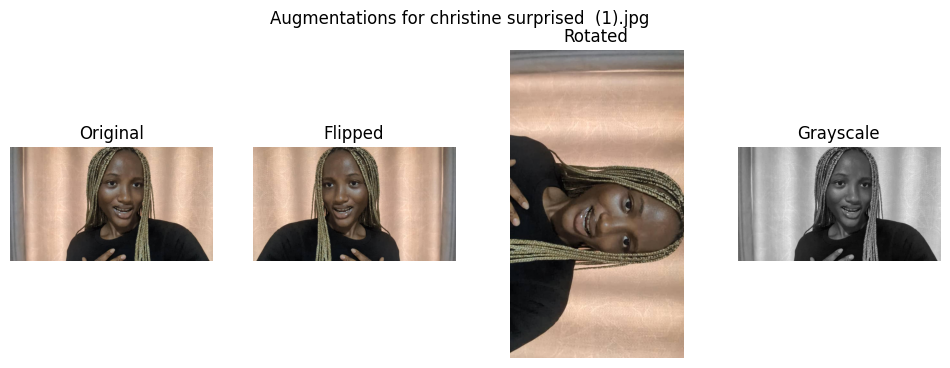

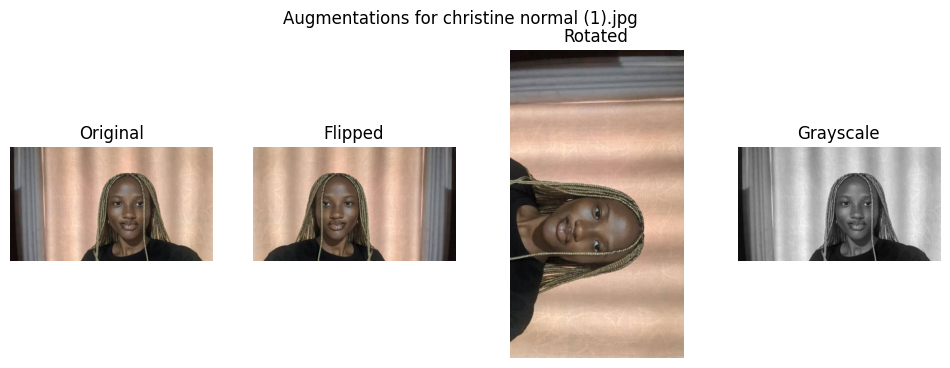

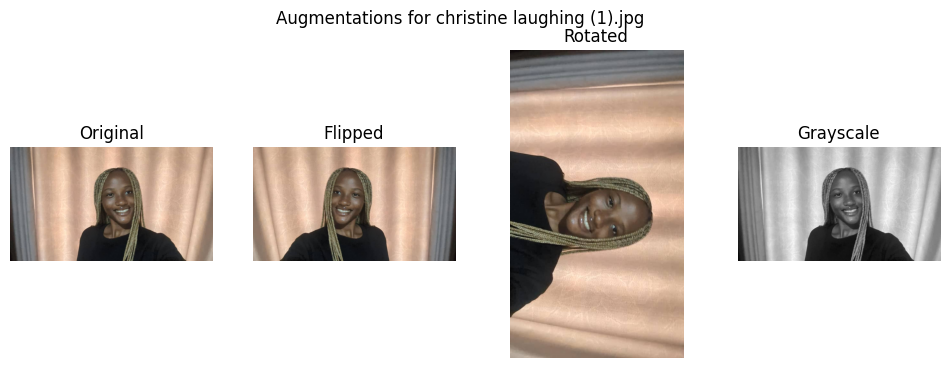

Displaying images and augmentations for member: loic


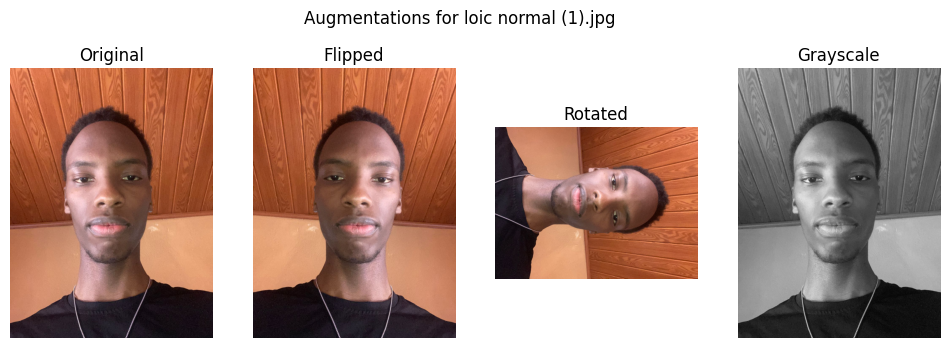

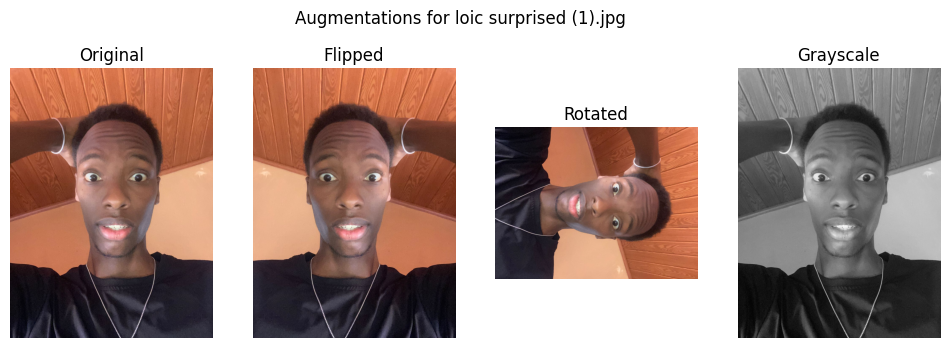

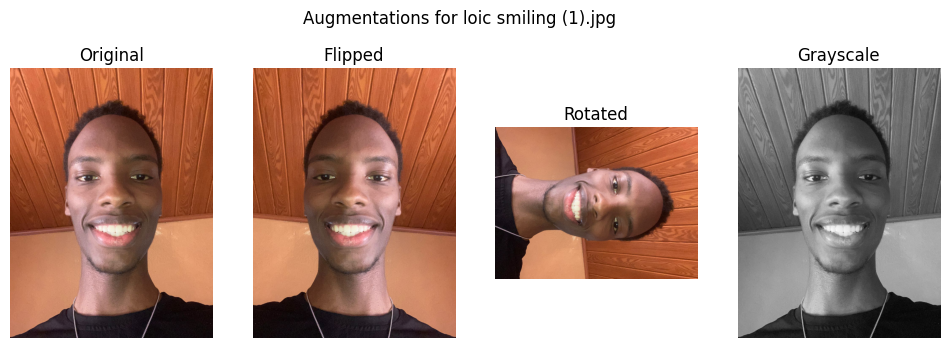

Displaying images and augmentations for member: roxanne


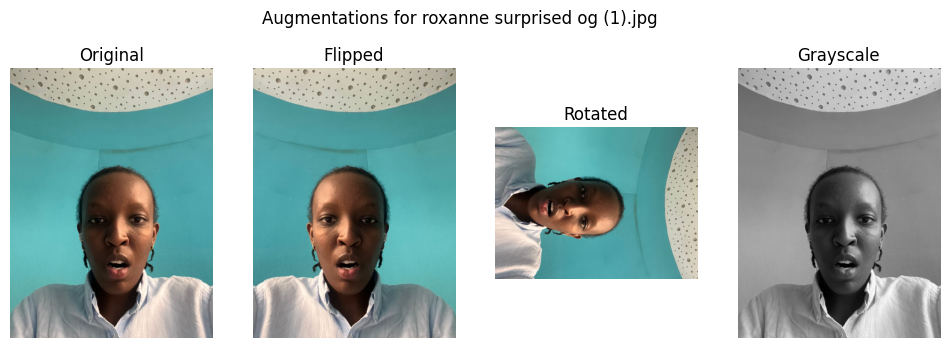

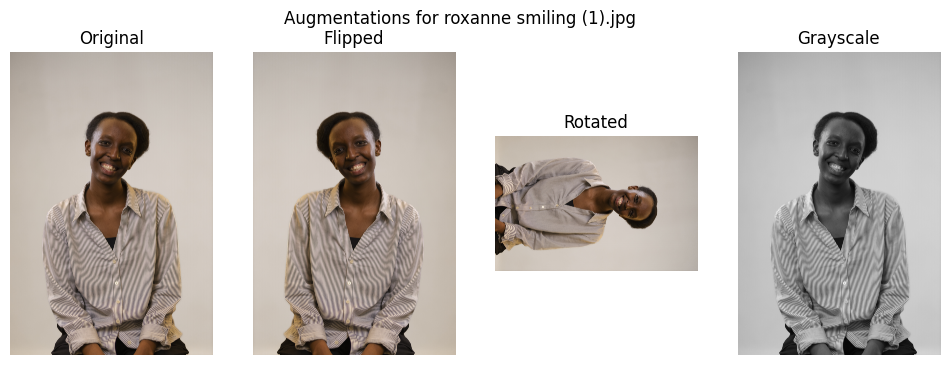

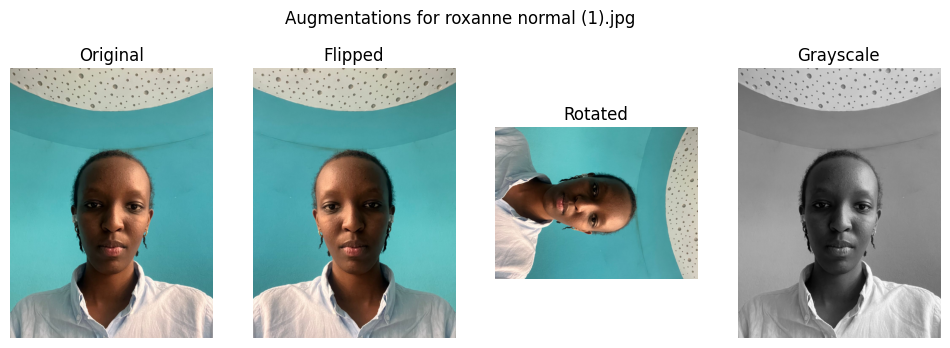

Displaying images and augmentations for member: irene


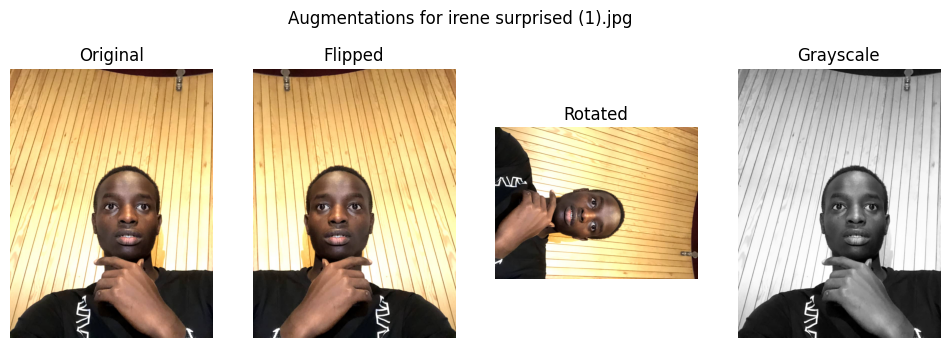

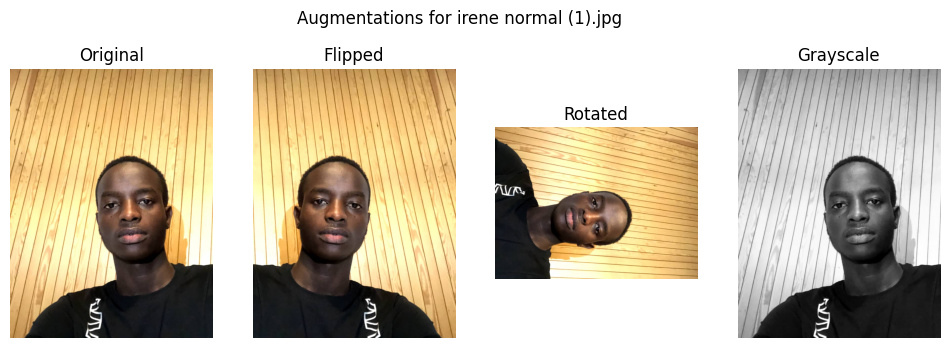

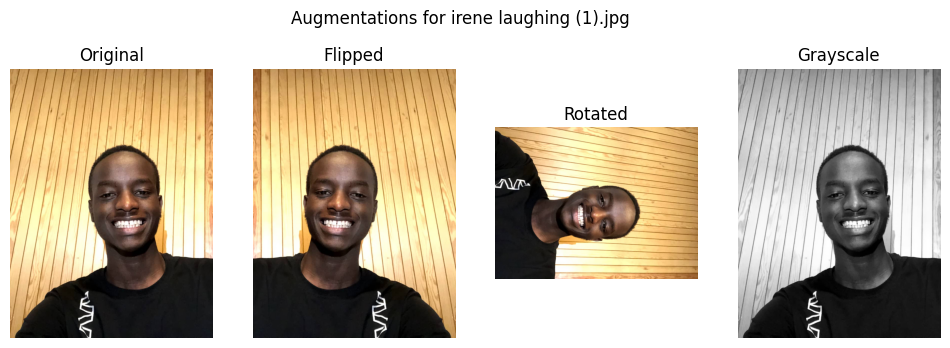

Displaying images and augmentations for member: jolly


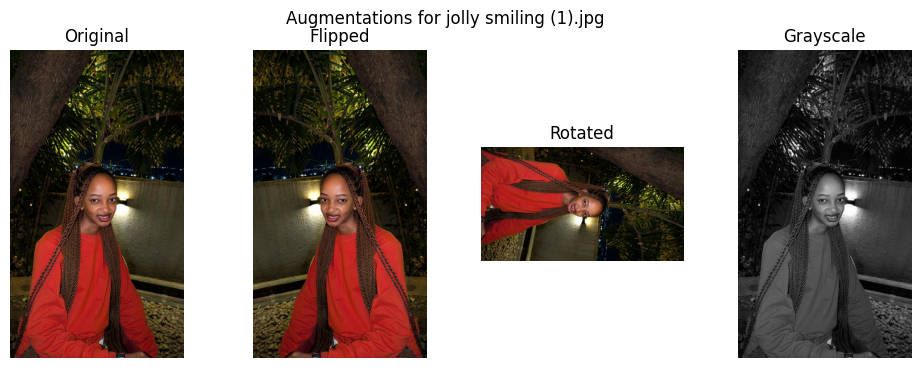

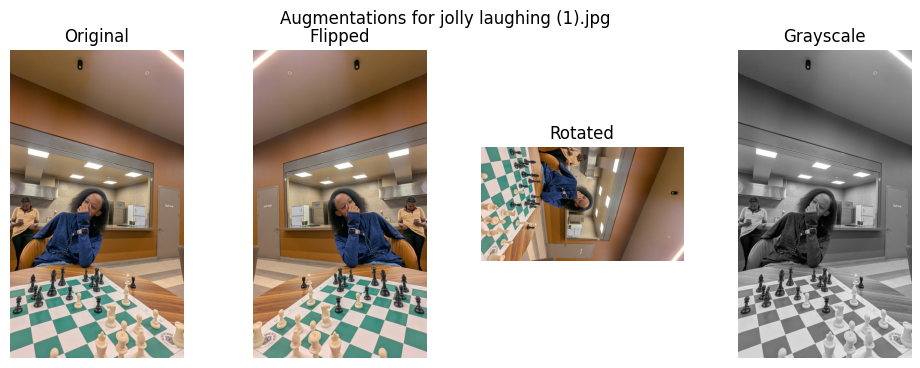

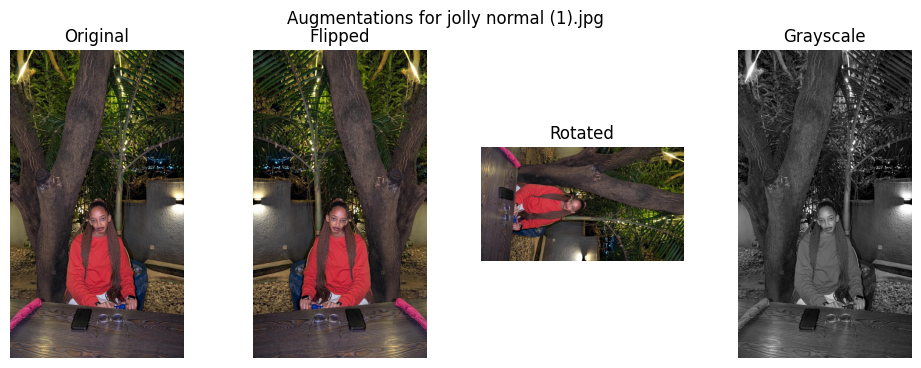

In [ ]:
import matplotlib.pyplot as plt

def show_augmentations(img_path):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    flip = cv2.flip(img, 1)
    rotate = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    plt.figure(figsize=(12,4))

    plt.subplot(1,4,1)
    plt.imshow(img_rgb)
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1,4,2)
    plt.imshow(cv2.cvtColor(flip, cv2.COLOR_BGR2RGB))
    plt.title('Flipped')
    plt.axis('off')

    plt.subplot(1,4,3)
    plt.imshow(cv2.cvtColor(rotate, cv2.COLOR_BGR2RGB))
    plt.title('Rotated')
    plt.axis('off')

    plt.subplot(1,4,4)
    plt.imshow(gray, cmap='gray')
    plt.title('Grayscale')
    plt.axis('off')

    plt.suptitle(f"Augmentations for {os.path.basename(img_path)}")
    plt.show()

# Example: show for all images of one member
base_dir = 'images/'
for member in os.listdir(base_dir):
    member_path = os.path.join(base_dir, member)
    if not os.path.isdir(member_path):
        continue

    print(f"Displaying images and augmentations for member: {member}")
    for img_file in os.listdir(member_path):
        img_path = os.path.join(member_path, img_file)
        show_augmentations(img_path)


In [ ]:
from google.colab import files

In [ ]:
files.download('image_features.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>